# 클래스함수 복습

## 객체와 클래스

|개념|설명|
|----|----|
|객체(Object)|실생활에 존재하는 실제적인 물건 또는 개념|
|속성(attribute)|객체가 가지고 있는 변수|
|행동(action)|객체가 실제로 작동할 수 있는 함수, 메소드|

* 클래스(class): 객체가 가져야 할 기본 정보를 담은 코드
* 인스턴스(instance): 실제로 생성되는 객체

In [1]:
# 클래스 구현하기
class SoccerPlayer(object):
    def __init__(self, name, position, back_number):
        # 이 클래스에서 사용할 변수 정의
        # self변수는 클래스에서 생성된 인스턴스에 접근하는 예약어, 생성된 인스턴스를 지정하는 변수
        self.name = name
        self.position = position
        self.back_number = back_number
        
    # self를 매개변수에 반드시 넣어야, 인스턴스가 사용할 수 있는 함수로 선언된다
    def change_back_number(self, new_number):
        print('선수의 등번호를 변경한다: From %d to %d' % (self.back_number, new_number))
        self.back_number = new_number
    
    # 클래스로 인스턴스를 생성했을 때, 그 인스턴스 자체를 print()함수로 화면에 출력하면 나오는 값
    def __str__(self):
        return "Hello, My name is %s. I play in %s in center." % (self.name, self.position)

In [2]:
lee = SoccerPlayer('lee', 'MF', 10)

print(lee)
print('현재 선수의 등번호는: ', lee.back_number)
lee.change_back_number(9)
print('현재 선수의 등번호는: ', lee.back_number)

Hello, My name is lee. I play in MF in center.
현재 선수의 등번호는:  10
선수의 등번호를 변경한다: From 10 to 9
현재 선수의 등번호는:  9


In [ ]:
# 클래스 구현 확장
# 데이터
names = ['Messi', 'Ramos', 'Ronaldo', 'Park', 'Buffon']
positions = ['LW', 'CB', 'ST', 'RM', 'GK']
numbers = [10, 4, 7, 13, 1]

# 전체 SoccerPlayer 코드
class SoccerPlayer(object):
    def __init__(self, name, position, back_number):
        self.name = name
        self.position = position
        self.back_number = back_number

    def change_back_number(self, new_number):
        print('선수의 등번호를 변경한다: From %d to %d' % (self.back_number, new_number))
        self.back_number = new_number
    
    def __str__(self):
        return "Hello, My name is %s. I play in %s in center." % (self.name, self.position)

In [ ]:
# 클래스-인스턴스
player_objects = [SoccerPlayer(name, position, number) for name, position, number in zip(names, positions, numbers)]
print(player_objects[0])

## 노트북 프로그램 만들기

* 노트를 정리하는 프로그램
* 사용자는 노트북에 콘텐츠를 적을 수 있다.
* 노트는 노트북에 삽입
* 노트북은 타이틀이 있다.
* 노트북은 노트가 삽입될 때 페이지를 생성, 최대 300페이지까지 저장할 수 있다.
* 300페이지를 넘기면 노트는 더는 삽입하지 못한다.

In [5]:
# vscode에서 실행
# note.py
class Note(object):
    def __init__(self, contents):
        self.contents = contents

    def get_number_of_lines(self):
        return self.contents.count('\n')
    
    def get_number_of_character(self):
        return len(self.contents)
    
    def remove(self):
        self.contents = '삭제된 노트입니다.'

    def __str__(self):
        return self.contents
    

In [6]:
class NoteBook(object):
    def __init__(self, name):
        self.name = name
        self.pages = 0
        self.notes = {}



    def add_note(self, note, page_number = 0):
        if len(self.notes.keys()) < 300:
            if page_number == 0:
                if self.pages < 301:
                    self.notes[self.pages] = note
                    self.pages += 1
                else:
                    for i in range(300):
                        if i not in list(self.notes,keys()):
                            self.notes[self.pages] = note
            else:
                if page_number not in self.notes.keys():
                    self.notes[page_number] = note
                else:
                    print('해당 페이지에는 이미 노트가 존재합니다.')
        else:
            print('더 이상 노트를 추가하지 못합니다.')

    def remove_note(self, page_number):
        del self.notes[page_number]

    def get_number_of_all_lines(self):
        result = 0
        for k in self.notes.keys():
            result += self.notes[k].get_number_of_characters()
        return result
    

    def get_number_of_all_pages(self):
        return len(self.notes.keys())
    
    def __str__(self):
        return self.name
    

In [ ]:
from note import Note
from notebook import NoteBook

good_sentence = """행복의 문이 하나 닫히면 다른 문이 열린다. 그러나 우리는 종종 닫힌 문을 멍하니 바라보다가 
우리를 향해 열린 문을 보지 못하게 된다. - 헬렌 켈러"""
note_1 = Note(good_sentence)
print(note_1)
good_sentence = """Stay hungry stay foolish - steve jobs"""
note_2 = Note(good_sentence)
good_sentence = """바보같고,멍청하고,생각없이,마음을 비우는 연습이 필요해 -배네딕트 컴버비치"""
note_3 = Note(good_sentence)
wise_saying_notebook = NoteBook('명언 노트')
wise_saying_notebook.add_note(note_1, 1)
wise_saying_notebook.add_note(note_2, 2)
wise_saying_notebook.add_note(note_3, 3)
print(wise_saying_notebook.get_number_of_all_pages())
print(note_3)
note_3.remove()
print(wise_saying_notebook)
print(note_1)
print(note_2)
print(note_3)


## 상속

* 부모 클래스로부터 값과 메소드를 물려받아 자식 클래스를 생성하는 것, 자식이 부모의 특성을 포함하여 생성되는 것

In [8]:
# 부모 클래스 Person 선언
class Person(object):
    # 생성자 생성
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
    # 메서드 선언
    def about_me(self):
        print('저의 이름은', self.name, '이고요, 제 나이는', str(self.age), '살입니다.')

* 부모클래스의 __init__()함수를 그대로 사용하고자 할 때 별도의 함수를 만들지 않아도 된다.
* 기존 함수를 사용하면서 새로운 내용을 추가하기 위해서는 자식 클래스에 __init__()함수를 생성하면서 super().__init__(매개변수)를 사용해여함
* super()는 부모 클래스를 가리킨다.
* 다중 상속도 지원한다.

In [9]:
# 부모클래스 Person으로부터 상속
class Employee(Person):
    def __init__(self, name, age, gender, salary, hire_date):
        # 부모 객체 사용
        super().__init__(name, age, gender)
        self.salary = salary
        # 속성값 추가
        self.hire_date = hire_date
    
    # 새로운 메서드 추가
    def do_work(self):
        print('열심히 일을 한다.')
        
    def about_me(self):
        # 부모 클래스 함수 재정의(overriding)
        super().about_me()
        print('제 급여는', self.salary, '원이고, 제 입사일은', self.hire_date, '입니다.')

# 장고를 이용하여 게시판 앱 만들기

## 스타일 적용하기

* 게시판에 스타일을 부여하기 위해 정적파일인 css를 적용해준다.
* 적용을 위해 static이라는 이름의 디렉토리를 mysite디렉토리와 동등한 위치에 생성해준다.
* static디렉토리 안에 css폴더를 추가로 만들어 준 뒤 부트스트랩 파일을 복사해준다.
* 이후, setting.py에 경로를 추가해준다.

In [ ]:
# config/settings.py파일에서 추가
# Static파일의 경로를 설정해준다
# 파일의 하단에 위치
STATIC_URL = '/static/'
STATICFILES_DIRS = [
    BASE_DIR / 'static',
]

* static/css폴더 안에 추가해준 부트스트랩 파일을 탬플릿에 스타일을 적용해준다.
* templates폴더에 bbsnote폴더와 동일한 위치에서 base.html파일을 생성한다.
* 장고는 템플릿 상속 기능을 제공하므로, 기본틀을 만들어 활용히 가능하다.
* base.html파일을 통해 기본 틀을 만들어 놓고 사용하고자 한다.

In [ ]:
# templates/base.html파일을 생성한 후에 내용추가
{% load static %}
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
    <link rel="stylesheet" type="text/css" href="{% static 'css/bootstrap.min.css' %}">
</head>
<body>
    # bodt태그 안 block content태그는 base.html을 상속받은 템플릿파일에서 구현해야 하는 영역이다
    <!-- 기본 팸플릿 안에 삽입될 내용 Start -->
    {% block content %}
    {% endblock %}
    <!-- 기본 팸플릿 안에 삽입될 내용 End -->
</body>
</html>

* 작성된 base.html을 상속받기 위한 템플릿 태그를 추가하고, block content 사이에 들어갈 내용을 구성해 준다.

In [ ]:
# templates/bbsnote/board_list.html파일을 수정
# base.html의 템플릿을 확장해서 가져온다
{% extends 'base.html' %}
# block content ~endblock사이에 base.html의 형식을 상속받을 내용을 덧붙여준다.
{% block content %}
<div class="container my-3">
    <table class="table">
        <thead>
        <tr class="text-center thead-dark"> 
            <th></th>           
            <th style="width:50%">제목</th>
            <th>작성일시</th>
        </tr>
        </thead>
        <tbody>
        {% if board_list %}
            {% for board in board_list %}
            <tr class="text-center">
                <td></td>
                <td class="text-left">
                    <a href="{% url 'bbsnote:detail' board.id %}">{{ board.subject }}</a>                
                </td>            
                <td>{{ board.create_date }}</td>
            </tr>
            {% endfor %}
            {% else %}
            <tr>
                <td colspan="3">글이 없습니다.</td>
            </tr>
            {% endif %}
            </tbody>
        </table> 
        <!-- 해당경로로 데이터를 get방식으로 넘겨받는다 -->
        <a href="{% url 'bbsnote:board_create' %}" class="btn btn-primary">등록</a>
</div>
{% endblock %}

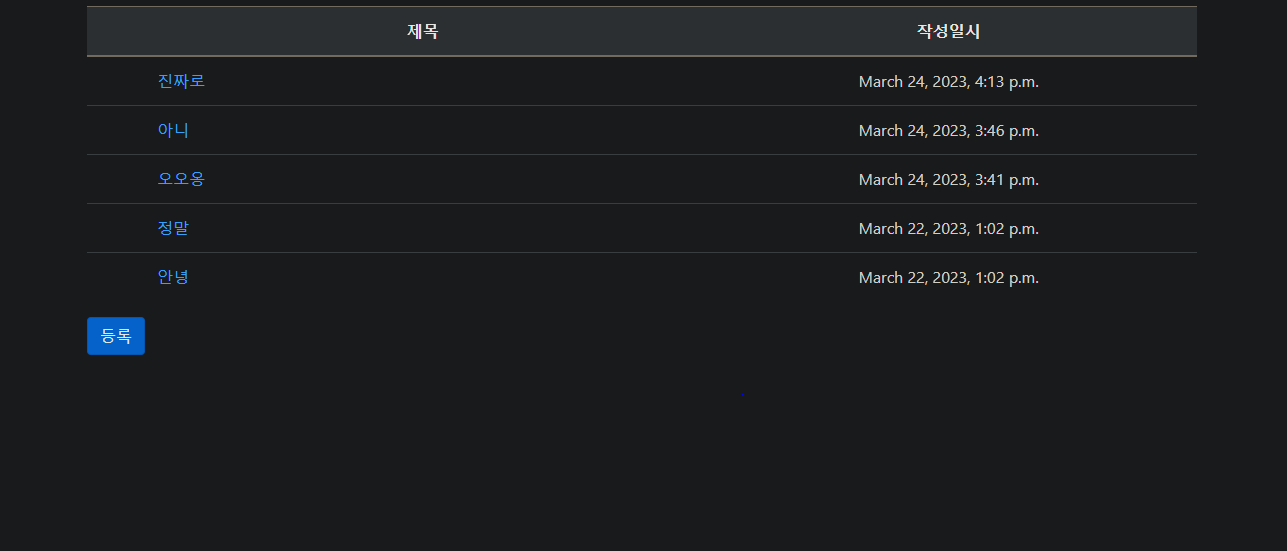

* 부트스트랩을 활용하여 스타일을 적용하면 기존의 html사이트보다 깔끔해진것을 알 수 있다.

## 게시글 등록 기능 만들기

In [ ]:
# bbsnote폴더내에 forms.py파일을 추가로 생성
from django import forms
from bbsnote.models import Board
# from .models import Board로 실행해도 상관없다

class BoardForm(forms.ModelForm):
    # class안에 class를 선언해준다
    class Meta:
        # model을 DB의 Board로 선언
        model = Board
        fields = ['subject', 'content']

### 모델 폼: forms.ModelForm을 상속받음
* 모델과 연결된 폼, 모델 폼 객체를 저장하면 연결된 모델의 데이터를 저장 할 수 있다.
* Meta클래스를 내부 클래스에 반드시 가져가야 하며, 모델 폼이 사용할 모델과 모델의 필드를 작성해야 한다.

### 폼: forms.Form을 상속받음
* 모델 폼과 다르게 직접 필드를 정의하고, 위젯 설정을 해줘야 한다.

In [ ]:
# bbsnote/urls.py파일에 게시글 등록 폼의 경로를 설정
urlpatterns = [
    path('', views.index, name='index'),
    path('<int:board_id>/', views.detail, name='detail'),
    path('comment/create/<int:board_id>/', views.comment_create, name='comment_create'),
    # 'board/create/'경로에 들어오면 뷰 함수 board_create과 매칭하여 호출
    path('board/create/', views.board_create, name='board_create'),
]

In [ ]:
# bbsnote/view.py파일에 board_create함수를 생성
def board_create(request):
    # 요청이 POST방식으로 들어왔으면(게시글에서 submit을 눌렀으면)
    if request.method == 'POST':
        # request.POST의 내용을 사용하여 BoardForm에 저장 후 form이라는 변수에 할당
        form = BoardForm(request.POST)
        # form에 내용이 있다면(is_valid는 True, False의 값을 가짐)
        if form.is_valid():
            # 저장을 하되 오토커밋을 하지 않는다(mysql의 커밋과 유사한 개냠)
            board = form.save(commit=False)
            board.create_date = timezone.now()
            # board를 커밋한다
            board.save()
            return redirect('bbsnote:index')
    # POST요청이 아니라면
    else:
        form = BoardForm()
    # 'bbsnote/board_form.html' 탬플릿을 사용하여 응답을 생성하고, 템플릿 context에 'form'변수로 폼 객체를 전달
    return render(request, 'bbsnote/board_form.html', {'form':form})

* board_create함수에서 전달된 BoardForm객체가 form.as_p의form이다.
* form.as_p는 subject, content에 값을 입력할 수 있는 HTML코드를 자동으로 만들어준다.

In [ ]:
# templates/bbsnote폴더 안에 board_form.html파일 생성
# 방법1: {{form.as_p}}를 사용하는 방법
{% extends 'base.html' %}
{% block content %}
<div class="container">
    <h5 class="my-3 border-bottom pb-2">게시글 등록</h5>
    <form method="post" class="post-form my-3">
        {% csrf_token %}
        <!-- 방법1 -->
        {{form.as_p}}
        <button type="submit" class="btn btn-primary">저장</button>
    </form>
</div>
{% endblock %}

In [ ]:
# {{form.as_p}}를 사용시 부트스트랩 옵션을 추가하려면 수동적으로 추가해줘야 한다.
# bbsnote/forms.py파일에서 선언했던 BoardForm의 Meta클래스에서 제공하는 widgets으로 가능하다.
# 이를 통해 부트스트래핑을 적용하여 subject와 content의 레이아웃을 조절할 수 있다.
# 단, 개별적으로 수정해야된다는 부분이 복잡하고 불편하므로
# form.html파일에서 부트스트래핑 옵션을 작성후 html파일만 수정하는 방법을 추천한다.
# bbsnote/forms.py파일 하단에 아래 내용 추가
widgets = {
    'subject': forms.TextInput(attrs={'class':'form-control'}),
    'content': forms.Textarea(attrs={'class':'form-control', 'rows':10}),
}
# labels를 통해 컬럼명을 바꿔줄 수 있다.
labels = {
    'subject': '제목',
    'content': '내용',
}

In [ ]:
# 방법2: board_form.html에서 다음 부트스트랩 코드를 추가({{% form.as_p}}는 제거)
{% extends 'base.html' %}
{% block content %}
<div class="container">
    <h5 class="my-3 border-bottom pb-2">게시글 등록</h5>
    <form method="post" class="post-form my-3">
        {% csrf_token %}
        <!-- 방법2 -->
        <div class="form-group">
            <label for="subject">제목</label>
            <input type="text" class="form-control" name="subject" id="subject"
                value="{{ form.subject.value|default_if_none:'' }}">
        </div>
        <div class="form-group">
            <label for="content">내용</label>
            <textarea class="form-control" name="content"
                id="content" rows="10">{{ form.content.value|default_if_none:'' }}</textarea>
        </div>
        
        <button type="submit" class="btn btn-primary">저장</button>
    </form>
</div>
{% endblock %}


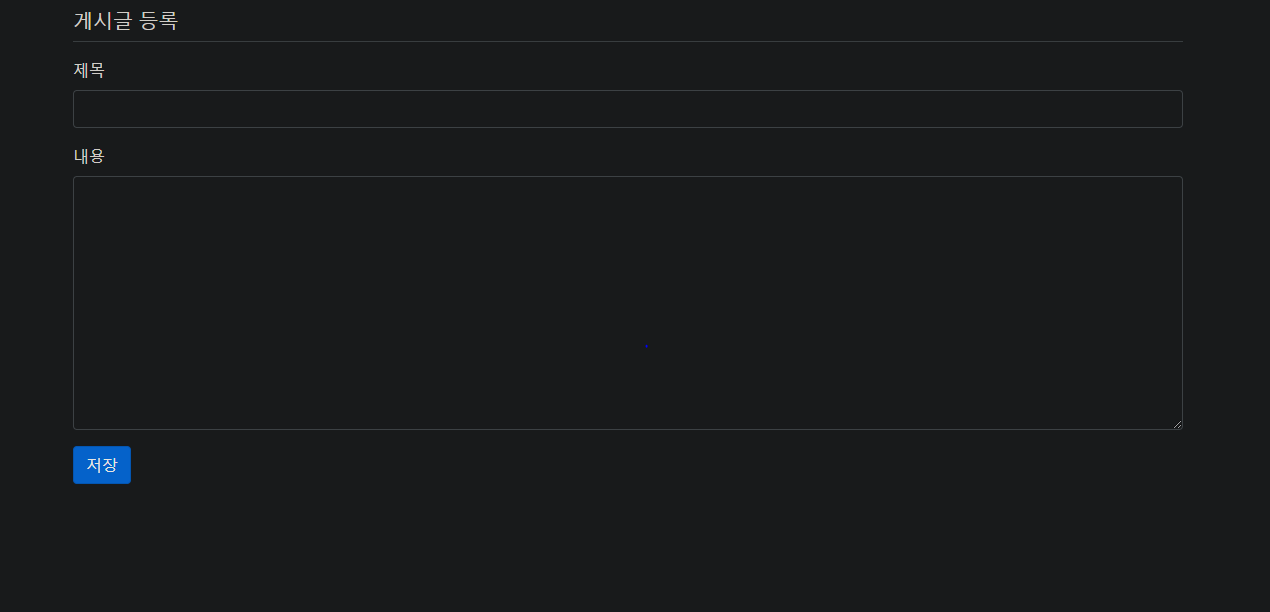

* 두 방법 모두 결과는 위와 같은 화면이 나온다. 하지만, 장기적으로 추가항목이 많아지게 된담녀 방법2가 수정하기 훨씬 수월할 것이다.